<a href="https://colab.research.google.com/github/Nandhu2k3/Machine-learning-Regressions-predictions/blob/main/Single_Layer_perceptron_for_regression_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes


In [2]:
data = load_diabetes()

# Split the data into training and test sets
X_train = data.data[:-20]
y_train = data.target[:-20]
X_test = data.data[-20:]
y_test = data.target[-20:]


In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.1, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for epoch in range(self.num_epochs):
            for i in range(X.shape[0]):
                # Calculate the predicted value
                y_pred = np.dot(self.weights, X[i]) + self.bias
                
                # Update the weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)
    
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            y_pred.append(np.dot(self.weights, X[i]) + self.bias)
        return np.array(y_pred)


In [4]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)


In [5]:
y_pred = perceptron.predict(X_test)


In [6]:
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)


Mean Squared Error: 1929.9193509907782


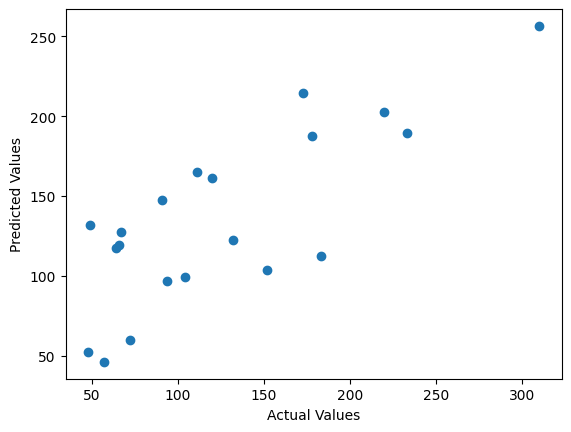

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
